In [1]:
# import libraries
import jax
import jax.numpy as jnp
import numpy as np
from jax import random
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Defining limits of plotting
X = np.arange(-5,5.1,0.1)
Y = np.arange(-5,5.1,0.1)

# 2-d Mean and covariance matrix
MeanVec = np.array([0,0])
CovMatrix= np.array([[1,0.6],[0.6,2]])

In [3]:
# 1-d PDFs for the "walls"
Z_x = scipy.stats.norm.pdf(X,loc = MeanVec[0],scale = np.sqrt(CovMatrix[0][0]))
Z_y = scipy.stats.norm.pdf(Y,loc=MeanVec[1],scale = np.sqrt(CovMatrix[1][1]))

# 2-d samples for the "floor"
Samples = np.random.multivariate_normal(MeanVec,CovMatrix,1000)

# sigma ellipses by transforming a circle by the cholesky decomposition
L = jax.scipy.linalg.cholesky(CovMatrix,lower = True )
t = np.linspace(0,2*np.pi,100) # ellipse will have 100 points on it
C = np.array([np.cos(t),np.sin(t)]) # a unit circle

# 3-sigma ellipses
E  = np.dot(L,C)
E1 = 1*E
E2 = 2*E
E3 = 3*E

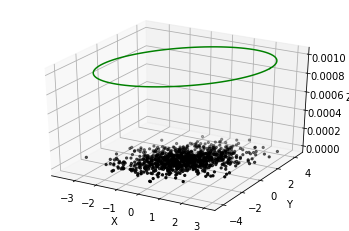

In [4]:
# Plot the samples on the "floor"
fig = plt.figure()
ax = plt.axes(projection='3d')
x = Samples[:,0]
y = Samples[:,1]
z = np.zeros(1000)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(x,y,z,c='k', marker='.')
ax.plot3D(E3[0,:], E3[1,:], 0.001 + np.zeros(100), 'green')

# Histogram

# Plotting the histograms on the walls from the data in the middle
[n_x, xout] = jnp.histogram(Samples[:,0], bins=20, range=None, weights=None, density=None)
n_x = n_x / ( sum(n_x) *(xout[1] - xout[0]))

# Now plotting the other histograms on the wall
[n_y, yout] = jnp.histogram(Samples[:,1], bins=20, range=None, weights=None, density=None)
n_y = n_y / ( sum(n_y) *(yout[1] - yout[0]))